In [44]:
import pystan
import arviz
import random
import csv
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def load_data(csv_file_path):
    data = []
    with open(csv_file_path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter='\n')
        for row in reader:
            data.append(row)
    return from_str_to_int(data)

In [38]:
def translate_str_to_int(string):
    return 0 if string == ['false'] else 1

def from_str_to_int(str_lst):
    return list(map(translate_str_to_int, str_lst))

In [56]:
def list_to_data(y):
    return {
        'N': len(y),
        'y':y
    }

In [39]:
mixture_model = """

data {
    int<lower=0> N; // number of people answered the survey
    int<lower=0, upper = 1> y[N]; // boolean array of answers
}

parameters {
    real<lower=0, upper=1> theta; // the latent variable we want to infer
}


model {
    theta ~ beta(0.5, 0.5); // beta prior
    for (i in 1:N){
        target +=
            log_mix(0.5, bernoulli_lpmf(y[i] | theta), bernoulli_lpmf(y[i] | 0.5));
    }
    
}
"""

<b>Data loading</b>

In [41]:
one_third_data = load_data('../resource/survey_one_third_data.csv')
half_data = load_data('../resource/survey_half_data.csv')
two_third_data = load_data('../resource/survey_two_third_data.csv')

<b>Plot the data </b>

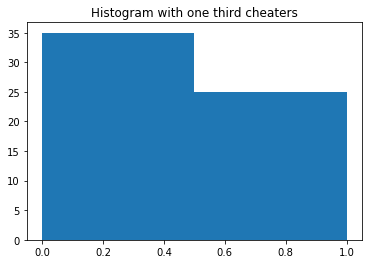

In [48]:
plt.hist(one_third_data, bins=2)
plt.title("Histogram with one third cheaters")
plt.show()

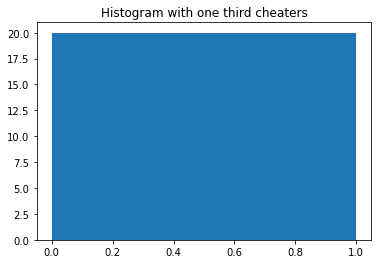

In [49]:
plt.hist(half_data, bins=2)
plt.title("Histogram with one third cheaters")
plt.show()

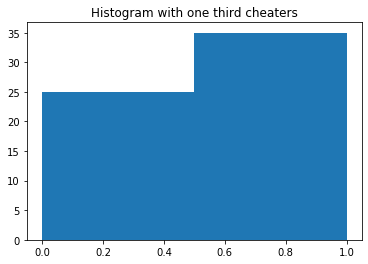

In [50]:
plt.hist(two_third_data, bins=2)
plt.title("Histogram with one third cheaters")
plt.show()

<b>running the infernce on each data set </b>

In [3]:
compiled_model = pystan.StanModel(model_code=mixture_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1faba59f95facd8bf45fceea85f1353e NOW.


<b>One Third Data</b>

In [64]:
fit = compiled_model.sampling(list_to_data(one_third_data))

In [65]:
print(fit)

Inference for Stan model: anon_model_1faba59f95facd8bf45fceea85f1353e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.33  4.5e-3   0.13   0.05   0.24   0.33   0.42   0.59    880    1.0
lp__  -42.18    0.06    1.1 -45.09 -42.32 -41.77 -41.56  -41.5    388   1.01

Samples were drawn using NUTS at Sun Apr 12 19:44:20 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D341F41E48>,
      dtype=object)

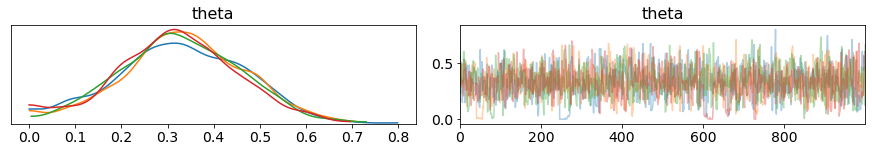

In [66]:
arviz.plot_trace(fit)

<b>Half Data</b>

In [58]:
fit = compiled_model.sampling(data =list_to_data(half_data))

In [59]:
print(fit)

Inference for Stan model: anon_model_1faba59f95facd8bf45fceea85f1353e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta    0.5  4.4e-3   0.17   0.18   0.39    0.5   0.61   0.84   1440    1.0
lp__  -29.08    0.03   0.96 -31.87 -29.26 -28.69 -28.48 -28.42    992    1.0

Samples were drawn using NUTS at Sun Apr 12 19:40:39 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D341E80FC8>,
      dtype=object)

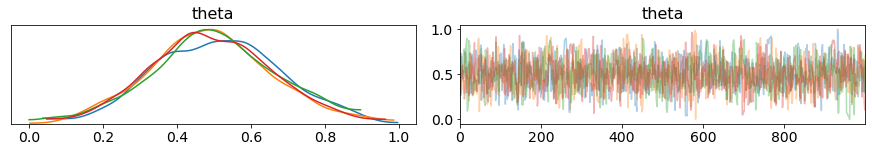

In [60]:
arviz.plot_trace(fit)

<b>Two Third Data</b>

In [61]:
fit = compiled_model.sampling(data =list_to_data(two_third_data))

In [62]:
print(fit)

Inference for Stan model: anon_model_1faba59f95facd8bf45fceea85f1353e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.68  4.3e-3   0.13   0.42   0.59   0.68   0.77   0.95    964    1.0
lp__  -42.16    0.04   0.96 -45.18 -42.34 -41.79 -41.56  -41.5    580    1.0

Samples were drawn using NUTS at Sun Apr 12 19:43:15 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D341F32488>,
      dtype=object)

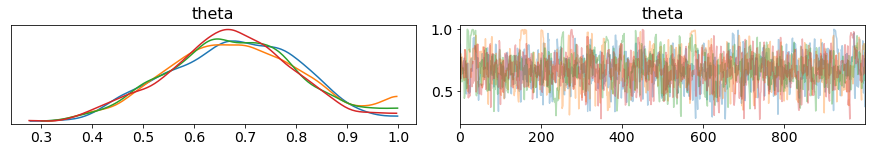

In [63]:
arviz.plot_trace(fit)